# Advertising Sales Channel Prediction:
# Problem Statement:
# Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  


In [1]:
#IMPORTING THE LIBRARIES NEEDED

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from  sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.model_selection import RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score



import warnings
warnings.filterwarnings('ignore')

In [2]:
#READ THE DATASET


df=pd.read_csv('C:/Users/HP/Desktop/data sets/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


we can see that there is five columns in this dataset ,unnamed:0, Tv,Radio,Newspaper and sales,where sales is the target variable,which is dependent and continuous in nature.unnamed:0,Tv,radio and newspaper are independent variables or input variables which will help to predict the target column,Sales.here we will build a model,for any company,which will help them to determine the right amount of money to be invested to different advertising sectors(TV,radio,sales)for promotion,if they launch a new product.It will be clearly visible which sector of advertising will give fruitful sales.As unnamed:0 is giving seriol nos,i think it will not help to predict the sales,so we will drop this later.

In [3]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

We can see that all TV,newspaper,radio and sales is having float type value and Unnamed:0 is having integer type of value.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.shape

(200, 5)

There aree 200 rows and 5 columns in this dataset.

In [6]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

Found out the column names of this dataset.

In [7]:
#CHECKING IS THERE ANY NULL VALUES

df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

There is no missing values n this dataset.

In [8]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

There is little bit of skewness in Newspaper column.

In [11]:
# Statistical summary
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


All the count data is equal,hence there is no missing values,All the interquartile ranges are equaly distributed.There may be skewness in the dataset because the differences between the mean and standard deviation is high in each and every column.

In [10]:
#Dropping "Unnamed: 0"
df=df.drop(["Unnamed: 0"],axis=1)

Droping this column becaus i think that it has no relation with the other column,and it will not contribute anything to predict the sales.

In [12]:
#checking the dataset after droping the "Unnamed: 0" column
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [29]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Heat Map:

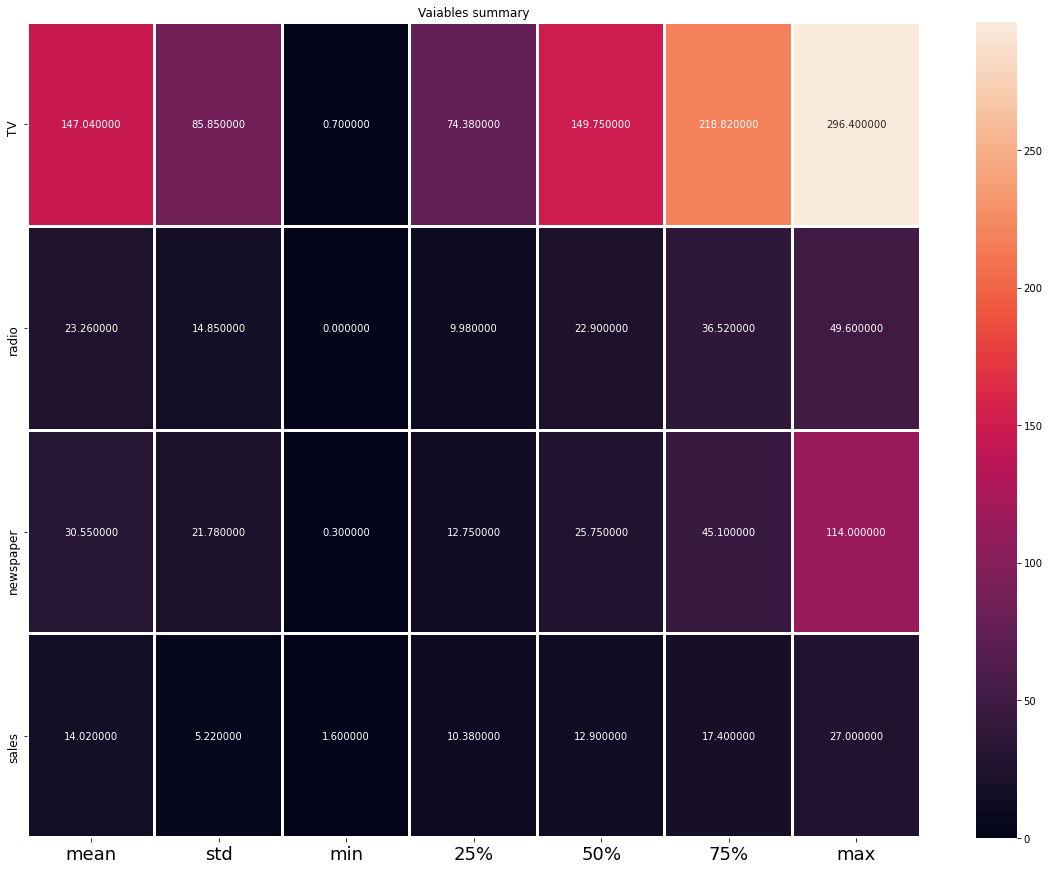

In [13]:
# Let's visualize above dataset.

plt.figure(figsize=(20,15))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Vaiables summary")
plt.show()

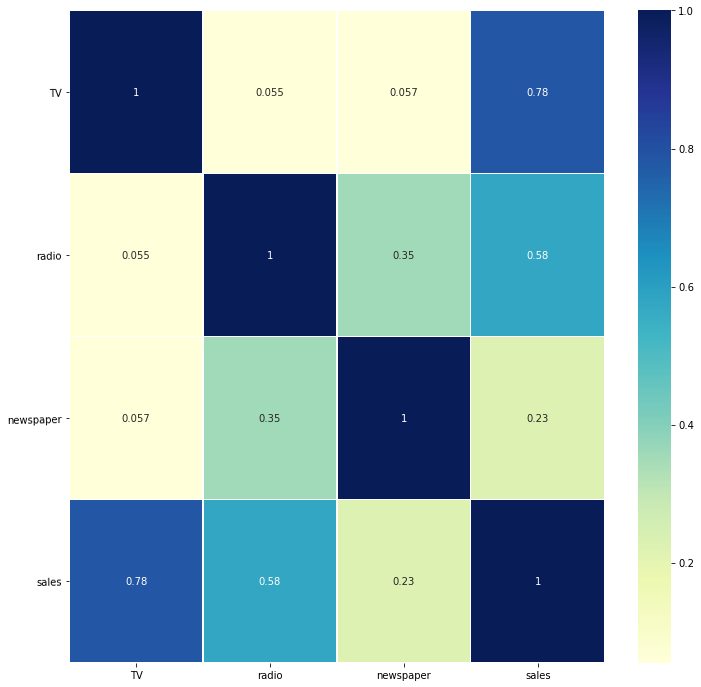

In [14]:
#Checking multicoliniearity ofFeature vs Feature and Feature vs Label with Heat map
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),linewidths=.1,cmap='YlGnBu', annot=True)
plt.yticks(rotation=1);

Every column is somehow  co-related with each other,and every column is important to find the predicted sales.

In [31]:
df['sales'].value_counts()  

9.7     5
12.9    4
11.7    4
15.9    4
25.4    3
       ..
15.7    1
14.2    1
11.2    1
19.4    1
18.5    1
Name: sales, Length: 121, dtype: int64

# Checking the relationship between the feautures and Sales:

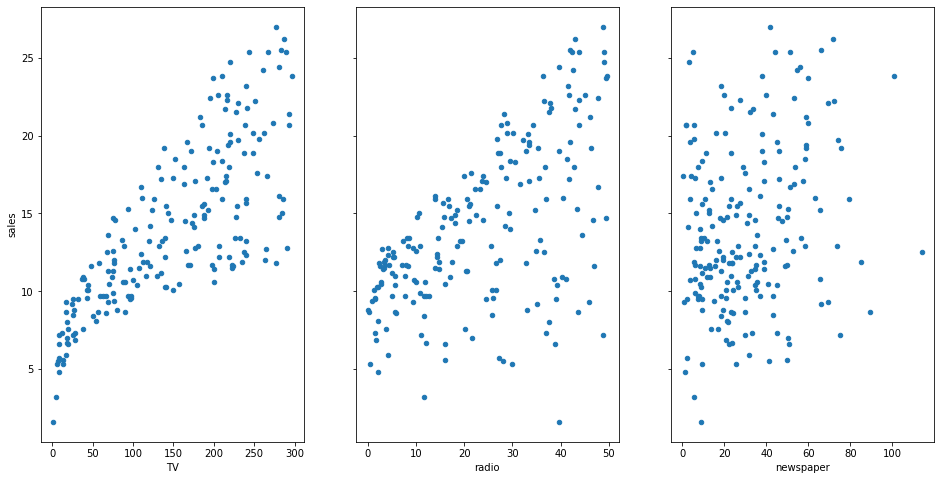

In [32]:
fig,axs = plt.subplots(1,3,sharey=True)
df.plot(kind='scatter',x='TV',y='sales',ax=axs[0],figsize=(16,8))
df.plot(kind='scatter',x='radio',y='sales',ax=axs[1],figsize=(16,8))
df.plot(kind='scatter',x='newspaper',y='sales',ax=axs[2],figsize=(16,8))
plt.show()


We can see by this scatter plot,that tv column data is least scattered,which shows Tv and sales is having the best relatonship among hthe others.Newspaper data is mostly scattered which doesnt show any best fit line structure and also give an idea that the data is not normally distributed in the newspaper column,where Tv column gives the idea of having normal distribution.

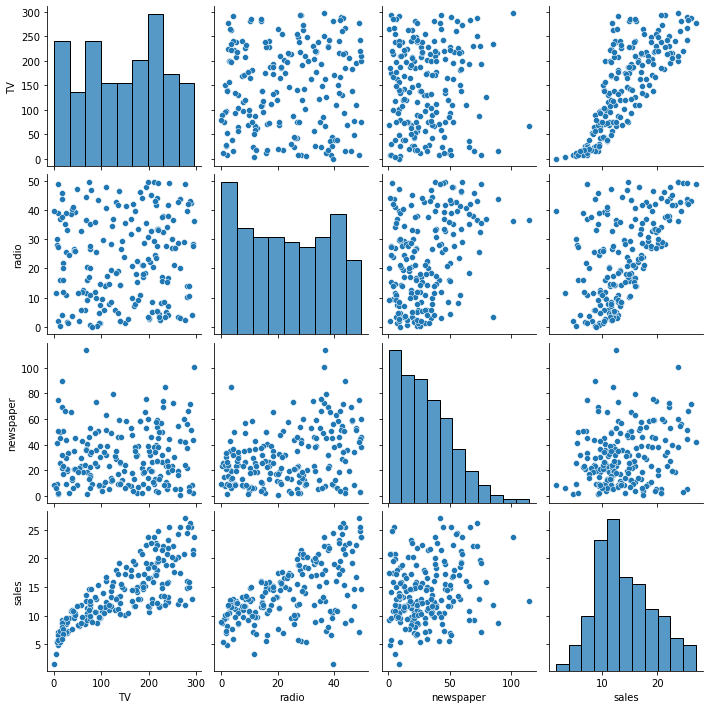

In [33]:
sns.pairplot(df)

We can clearly depict that Tv column  is normally distributed and the is scattered almost in best fit line manner.The news paper column data is not scattered in best fit line manner and the column is having right skewness and having outliers in it.we will remove the outliers by applying zscore latter.

# Let's visualize how data is distributed for every column:

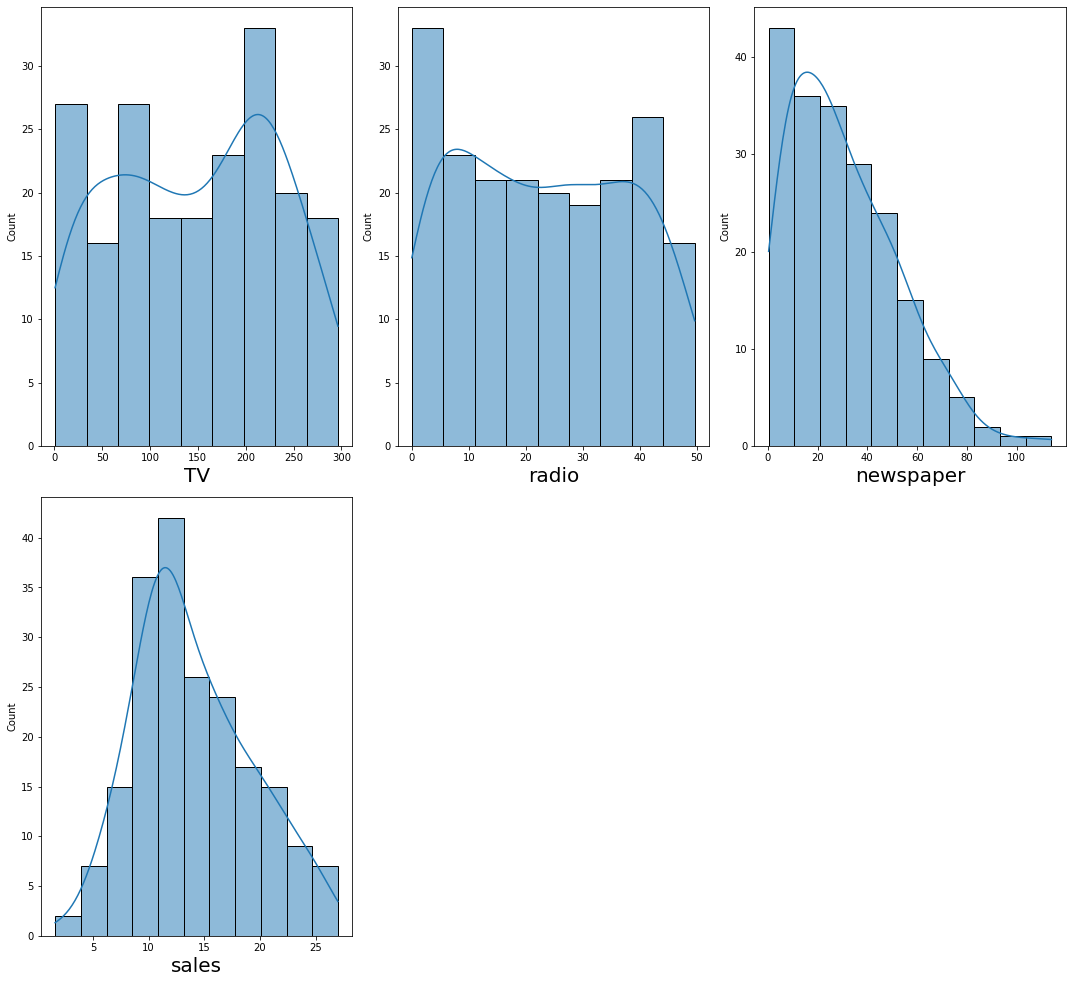

In [35]:
plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(df[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Tv,Radio and sales is normally distributed.The newspaper column is not normally distributed,it is having right skewness ,we will remove the skewness and outliers by applying various techniques latter.

Text(0.5, 1.0, 'Sales vs Tv')

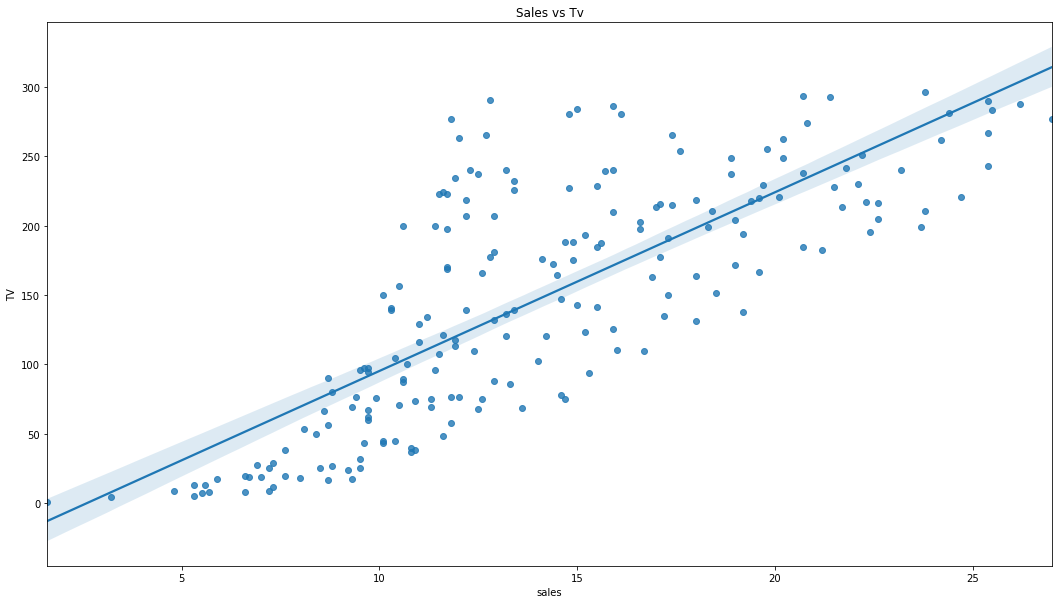

In [9]:
#Plotting Sales vs Tv
plt.rcParams['figure.figsize'] = (18, 10)
sns.regplot(df['sales'], df['TV'])
plt.title('Sales vs Tv')

The datas are scattered properly within and near the line .which shows the Tv column is highly co-related with sales and having less outlier and skewness.

Text(0.5, 1.0, 'Sales vs radio')

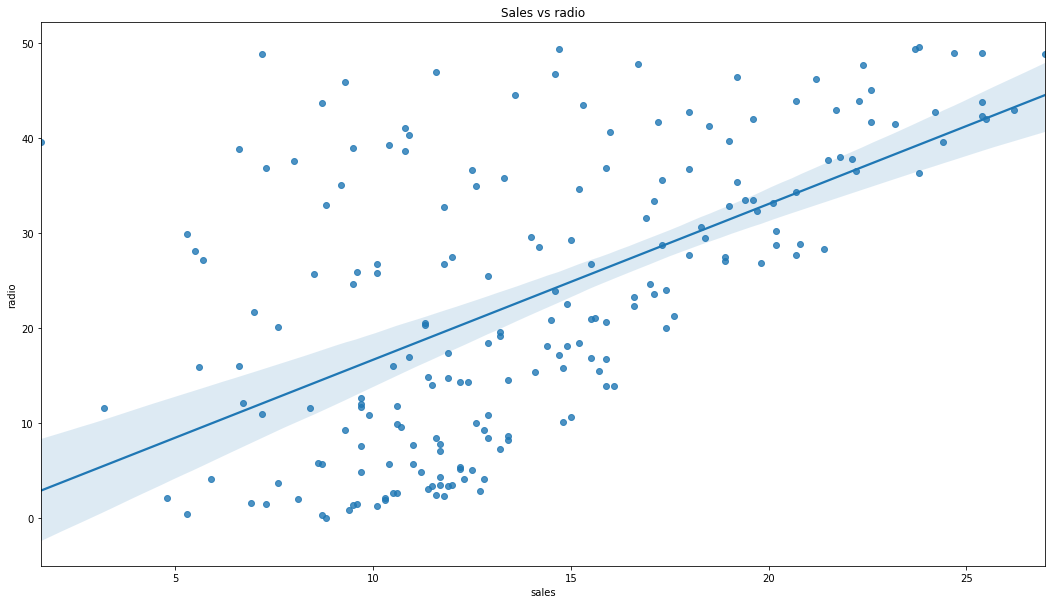

In [10]:
# Plotted Sales vs Radio
plt.rcParams['figure.figsize'] = (18, 10)
sns.regplot(df['sales'], df['radio'])
plt.title('Sales vs radio')

The line is showing little bit inclination and the datas are far away from the line ,which suggests the radio column is less related with Sales column.

Text(0.5, 1.0, 'Sales vs newspaper')

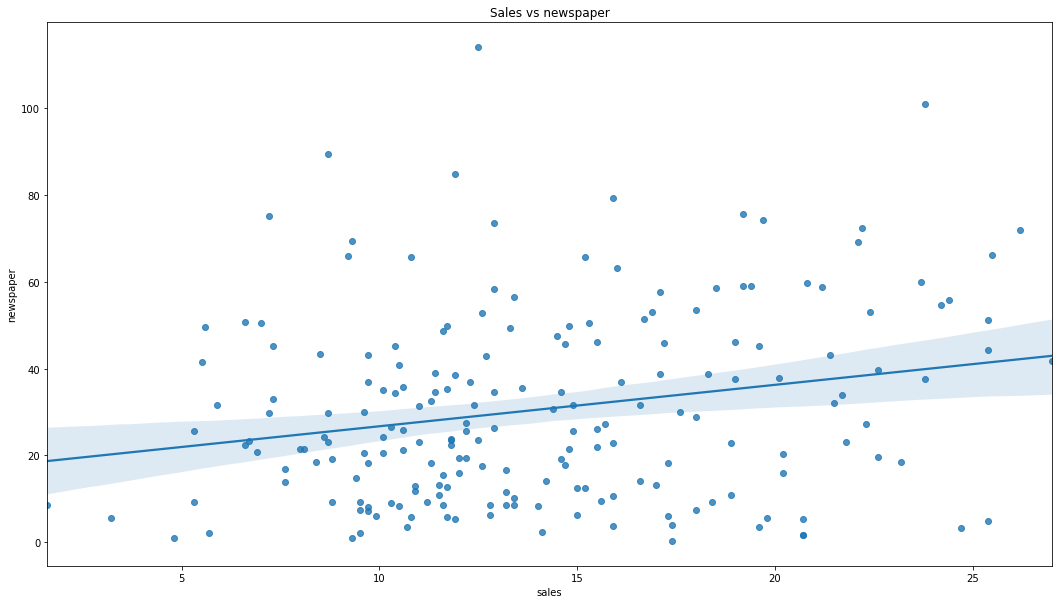

In [11]:
#Plotting Sales vs newspapaer
plt.rcParams['figure.figsize'] = (18, 10)
sns.regplot(df['sales'], df['newspaper'])
plt.title('Sales vs newspaper')

The line is almost straight,there is no such inclination and the datas are almost scattered here and there which suggests that newspaper column is having least relation with the sales column and have skewness while viewing for normal distributuon.

In [36]:
# Multicolinearity Detection

corr = df.corr()
corr

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


Tv column is highly correlated with sales,then radio and lastly Newspapaer.

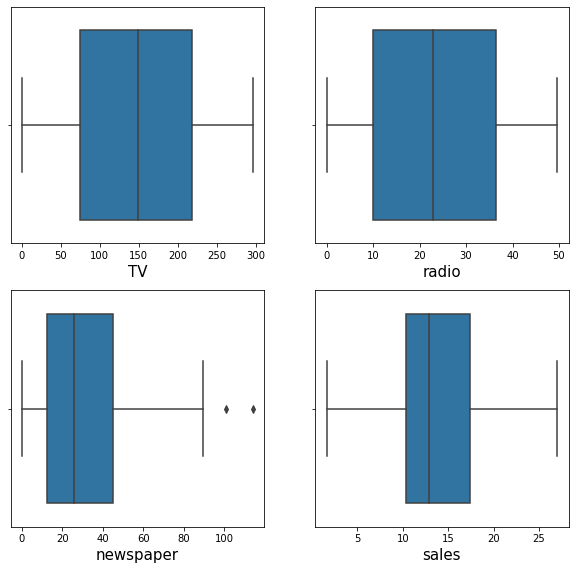

In [37]:
# Checking the outliers by using boxplot
plt.figure(figsize=(10,20))
graph=1
for column in df:
    if graph<=8:
        ax=plt.subplot(4,2,graph)
        sns.boxplot(df[column],)
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

We can find by the above boxplot that there is no such outliers in the columns except the newspaper column.Though the newspaper is having less outlier we will remove it by using z-score for better accuracy score.

# Outlier Removal by using Z-score:

In [44]:
z_score = zscore(df[['newspaper']])
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<1).all(axis=1)

df=df[filtering_entry]
df.describe()

,TV,radio,newspaper,sales
count,132.000000,132.000000,132.000000,132.000000
mean,139.248485,20.931061,28.041667,13.321970
std,82.366350,14.231119,12.257062,4.753244
min,5.400000,0.000000,9.000000,5.300000
25%,69.000000,8.250000,18.375000,10.100000
50%,137.700000,19.850000,26.050000,12.200000
75%,211.450000,31.150000,37.700000,15.900000
max,292.900000,49.600000,51.400000,27.000000


In [45]:
df.shape

(132, 4)

We loose data after using Z-score,i hope it will be helpful for getting a fruitful accuracy score.we dont want to loose more data.

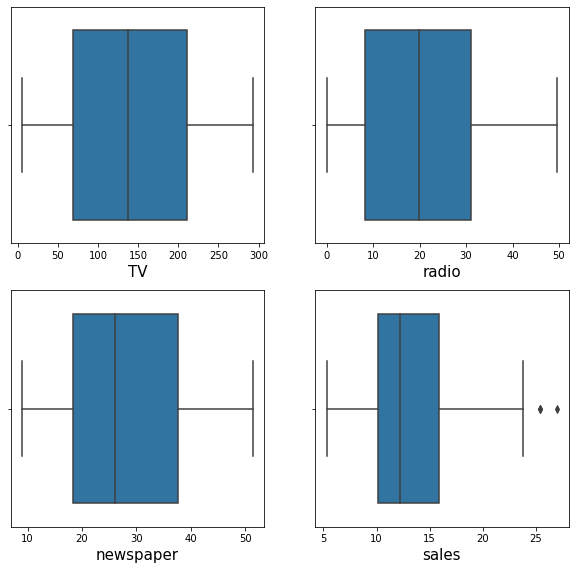

In [46]:
# Checking the outliers by using boxplot
plt.figure(figsize=(10,20))
graph=1
for column in df:
    if graph<=8:
        ax=plt.subplot(4,2,graph)
        sns.boxplot(df[column],)
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

All the outliers are removed,now we can proceed for further techniques to achive a good accuracy score.

# Dividing the dataset into features and label:

In [47]:
y = df['sales']
x = df.drop(columns=['sales'])
x

,TV,radio,newspaper
1,44.5,39.3,45.1
6,57.5,32.8,23.5
7,120.2,19.6,11.6
9,199.8,2.6,21.2
10,66.1,5.8,24.2
...,...,...,...
186,139.5,2.1,26.6
187,191.1,28.7,18.2
189,18.7,12.1,23.4
192,17.2,4.1,31.6


# Standardization:

In [49]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x

,TV,radio,newspaper
1,44.5,39.3,45.1
6,57.5,32.8,23.5
7,120.2,19.6,11.6
9,199.8,2.6,21.2
10,66.1,5.8,24.2
...,...,...,...
186,139.5,2.1,26.6
187,191.1,28.7,18.2
189,18.7,12.1,23.4
192,17.2,4.1,31.6


# VIF:

In [50]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.004199,TV
1,1.084802,radio
2,1.080446,newspaper


The columns are co-related to each other.

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=21)

# Model Creation:
# 1 .K-Neighbors Regressor:


In [52]:
#Model training
kn = KNeighborsRegressor()
kn.fit(x_train,y_train)

KNeighborsRegressor()

In [53]:
#Prediction with trained data
yknpred = kn.predict(x_train)

In [54]:
print("R Square Score of kn:", metrics.r2_score(y_train,yknpred))

R Square Score of kn: 0.9555923691715368


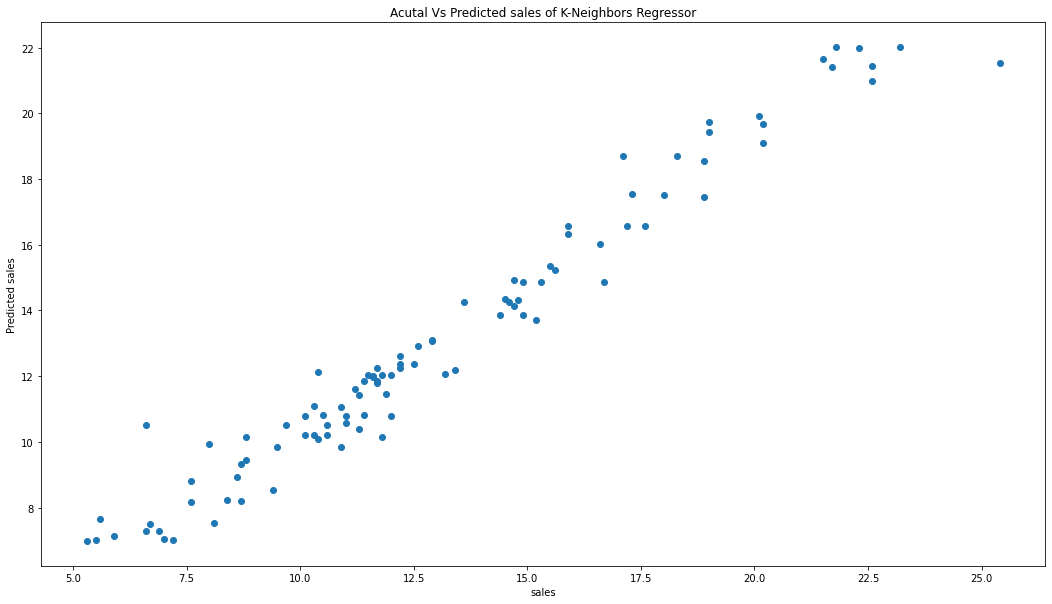

In [55]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,yknpred)
plt.xlabel('sales')
plt.ylabel('Predicted sales')
plt.title('Acutal Vs Predicted sales of K-Neighbors Regressor')
plt.show()

In [56]:
# Predicting test data with model:
y_test_kn_pred = kn.predict(x_test)

In [57]:
kn_accuracy = metrics.r2_score(y_test,y_test_kn_pred)
print("R Square Score of K-Neighbors Regressor:",kn_accuracy)

R Square Score of K-Neighbors Regressor: 0.8929819303178808


In [58]:
print ('mean absolute error of K-Neighbors Regressor is: ',mean_absolute_error(y_test,y_test_kn_pred))

mean absolute error of K-Neighbors Regressor is:  1.1151515151515152


In [59]:
print ('mean squared error of K-Neighbors Regressor is: ',mean_squared_error(y_test,y_test_kn_pred))

mean squared error of K-Neighbors Regressor is:  2.747636363636364


In [60]:
print ('Root mean squared error of K-Neighbors Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_kn_pred)))

Root mean squared error of K-Neighbors Regressor is:  1.6575995787995255


# 2. Support Vector Regression (SVR)

In [61]:
#Model Training
svr = SVR()
svr.fit(x_train,y_train)

SVR()

In [62]:
#Prediction with trained data:
ysvrpred = svr.predict(x_train)

In [63]:
print("R Square Score of svr:", metrics.r2_score(y_train,ysvrpred))

R Square Score of svr: 0.9122580720026026


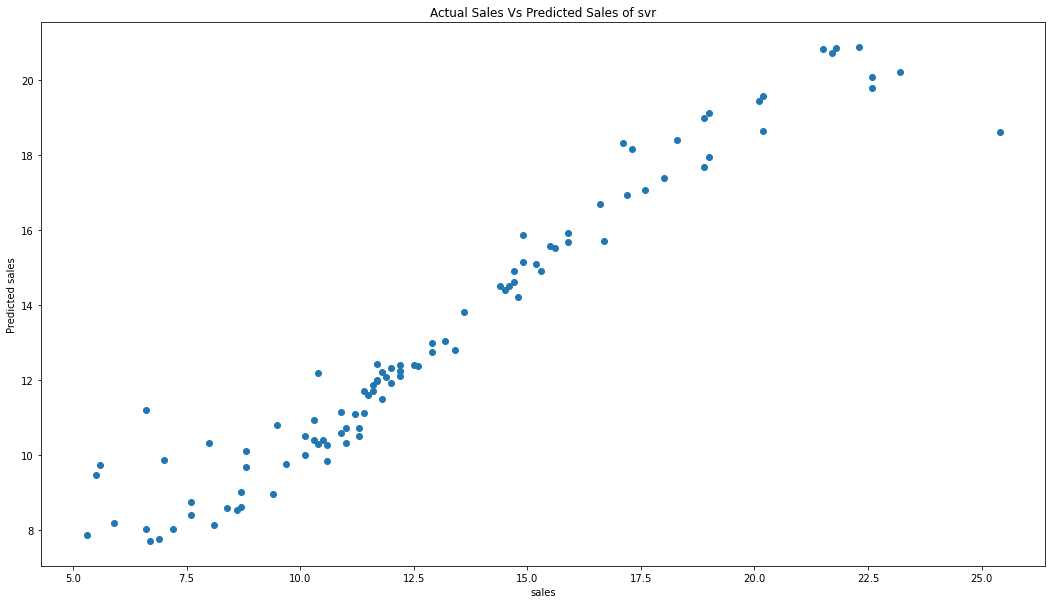

In [64]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,ysvrpred)
plt.xlabel('sales')
plt.ylabel('Predicted sales')
plt.title('Actual Sales Vs Predicted Sales of svr')
plt.show()

In [65]:
# Predicting test data with model:
y_test_svr_pred = svr.predict(x_test)

In [66]:
svr_accuracy = metrics.r2_score(y_test,y_test_svr_pred)
print("R Square Score of SVR:",svr_accuracy)

R Square Score of SVR: 0.7187554359365087


In [67]:
print ('mean absolute error of SVR: ',mean_absolute_error(y_test,y_test_svr_pred))

mean absolute error of SVR:  1.5214249397708985


In [68]:
print ('mean squared error of SVR: ',mean_squared_error(y_test,y_test_svr_pred))

mean squared error of SVR:  7.220816013513085


In [69]:
print ('Root mean squared error of SVR: ',np.sqrt(mean_squared_error(y_test,y_test_svr_pred)))

Root mean squared error of SVR:  2.68715760861046


# 3.Ada Boost Regressor

In [70]:
#Model Training
abr = AdaBoostRegressor()
abr.fit(x_train,y_train)

AdaBoostRegressor()

In [71]:
#Prediction with trained data:
yabrpred = abr.predict(x_train)

In [72]:
print("R Square Score of AdaBoostRegressor:", metrics.r2_score(y_train,yabrpred))

R Square Score of AdaBoostRegressor: 0.9757546080250175


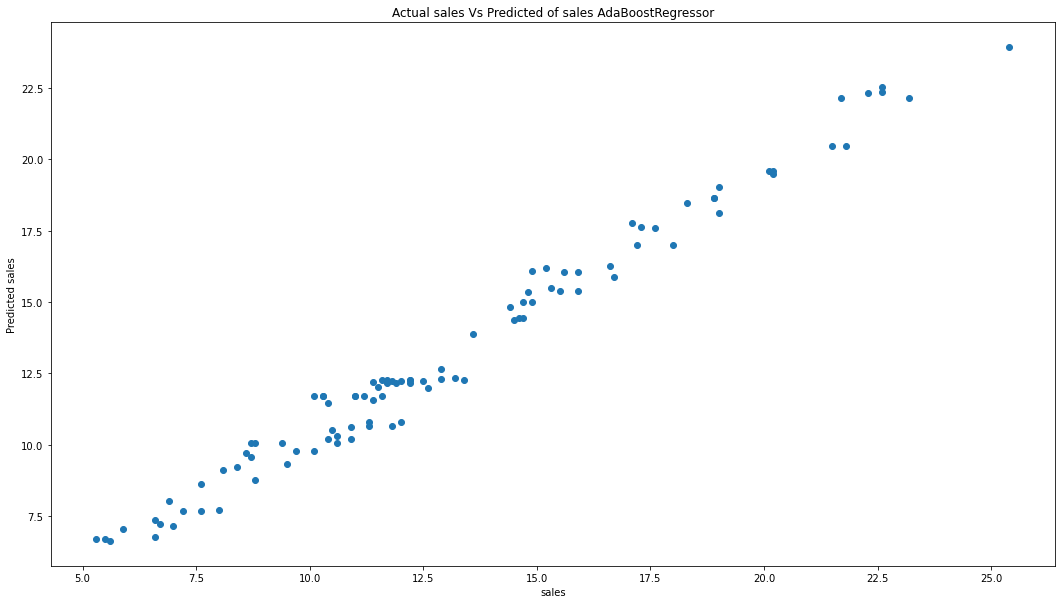

In [73]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,yabrpred)
plt.xlabel('sales')
plt.ylabel('Predicted sales')
plt.title('Actual sales Vs Predicted of sales AdaBoostRegressor')
plt.show()

In [74]:
# Predicting test data with model:
y_test_abr_pred = abr.predict(x_test)

In [75]:
abr_accuracy = metrics.r2_score(y_test,y_test_abr_pred)
print("R Square Score of AdaBoostRegressor:",abr_accuracy)

R Square Score of AdaBoostRegressor: 0.9404871121451112


In [76]:
print ('mean absolute error of AdaBoostRegressor: ',mean_absolute_error(y_test,y_test_abr_pred))

mean absolute error of AdaBoostRegressor:  0.9052653509074615


In [77]:
print ('mean squared error of AdaBoostRegressor: ',mean_squared_error(y_test,y_test_abr_pred))

mean squared error of AdaBoostRegressor:  1.5279641583969512


In [78]:
print ('Root mean squared error of AdaBoostRegressor: ',np.sqrt(mean_squared_error(y_test,y_test_abr_pred)))

Root mean squared error of AdaBoostRegressor:  1.2361084735560028


# 4. Linear Regression:

In [79]:
#Model Training
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [80]:
#Prediction with trained data:
ylrpred = lr.predict(x_train)

In [81]:
print("R Square Score of Linear Regression:", metrics.r2_score(y_train,ylrpred))

R Square Score of Linear Regression: 0.9085591710363434


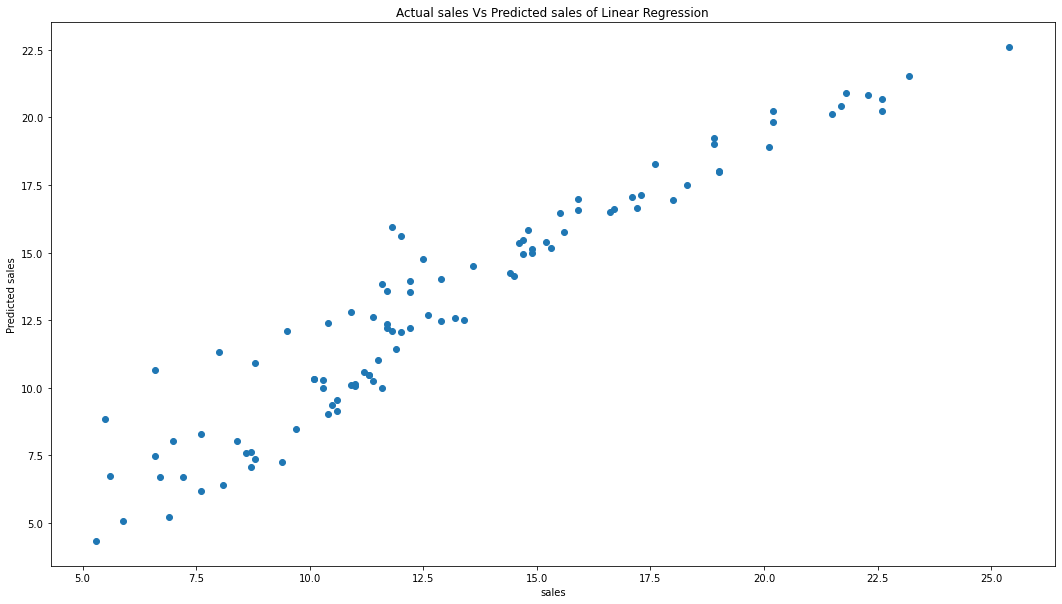

In [82]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,ylrpred)
plt.xlabel('sales')
plt.ylabel('Predicted sales')
plt.title('Actual sales Vs Predicted sales of Linear Regression')
plt.show()

In [83]:
# Predicting test data with model:
y_test_lr_pred = lr.predict(x_test)

In [84]:
lr_accuracy = metrics.r2_score(y_test,y_test_lr_pred)
print("R Square Score of Linear Regression:",lr_accuracy)

R Square Score of Linear Regression: 0.8838360139953365


In [85]:
print ('mean absolute error of Linear Regression: ',mean_absolute_error(y_test,y_test_lr_pred))

mean absolute error of Linear Regression:  1.315012357840175


In [86]:
print ('mean squared error of Linear Regression: ',mean_squared_error(y_test,y_test_lr_pred))

mean squared error of Linear Regression:  2.98245327204484


In [87]:
print ('Root mean squared error of Linear Regression: ',np.sqrt(mean_squared_error(y_test,y_test_lr_pred)))

Root mean squared error of Linear Regression:  1.7269780751488537


# 5.Random ForestRegressor

In [88]:
#Model Training:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [89]:
#Model Prediction with trained data:
y_rfr_pred = rfr.predict(x_train)

In [90]:
print("R Square Score of Random Forest Regressor:",metrics.r2_score(y_train,y_rfr_pred))

R Square Score of Random Forest Regressor: 0.9955808858313884


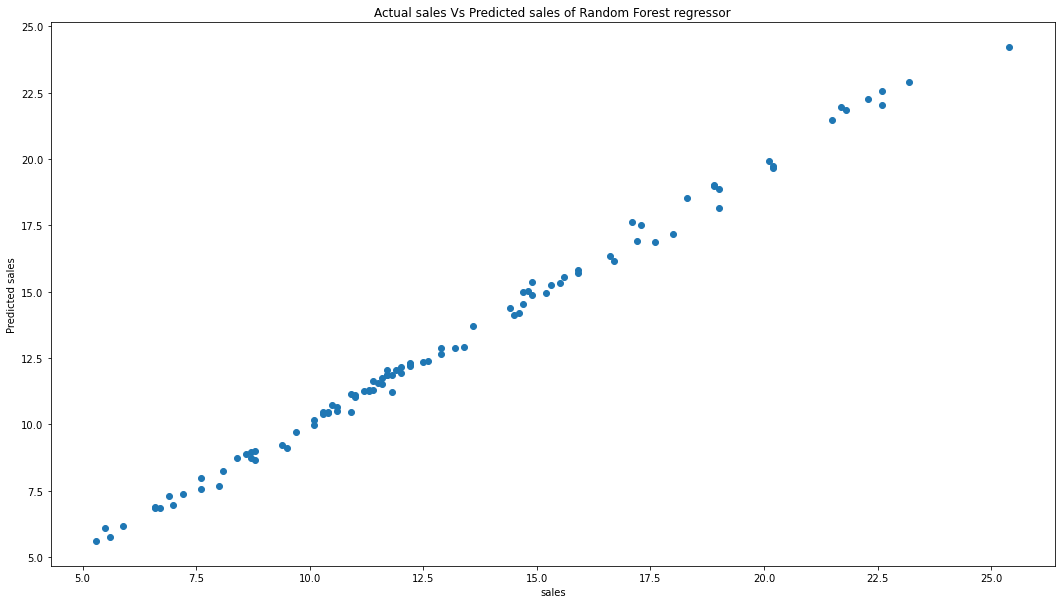

In [91]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_rfr_pred)
plt.xlabel('sales')
plt.ylabel('Predicted sales')
plt.title('Actual sales Vs Predicted sales of Random Forest regressor')
plt.show()

In [92]:
# Predicting test data with model:
y_test_rfr_pred = rfr.predict(x_test)

In [93]:
rfr_accuracy = metrics.r2_score(y_test,y_test_rfr_pred)
print("R Square Score of Random Forest Regressor:",rfr_accuracy)

R Square Score of Random Forest Regressor: 0.9605172817578547


In [94]:
print ('mean absolute error of Random Forest Regressor: ',mean_absolute_error(y_test,y_test_rfr_pred))

mean absolute error of Random Forest Regressor:  0.6906666666666633


In [95]:
print ('mean squared error of Random Forest Regressor is: ',mean_squared_error(y_test,y_test_rfr_pred))

mean squared error of Random Forest Regressor is:  1.0136993939393861


In [96]:
print ('Root mean squared error of Random Forest Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_rfr_pred)))

Root mean squared error of Random Forest Regressor is:  1.006826397120867


# Regularization:

In [97]:
#Regularization with Lasso
lasscv = LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [98]:
#best alpha parameter
alpha = lasscv.alpha_
alpha

0.00035582213118116906

In [99]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.00035582213118116906)

In [100]:
lasso_reg.score(x_test,y_test)

0.8838391115646649

In [101]:
# Regularization with Ridge
ridgecv = RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [102]:
ridge_alpha= ridgecv.alpha_
ridge_alpha

0.001

In [103]:
ridge_model = Ridge(ridge_alpha)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [104]:
ridge_model.score(x_test,y_test)

0.8838354737915421

Both Lasso and Ridge is giving same score 88.3%.

# CROSS VALIDATION:

In [105]:
#Cv of KNN Regression
kn_cv_score = cross_val_score(kn,x_train,y_train,cv=5,scoring='r2')
print(kn_cv_score)
print('mean :',kn_cv_score.mean())

[0.91951097 0.88684516 0.88193444 0.89185892 0.89716505]
mean : 0.8954629083173694


In [106]:
#CV of Support Vector Regressor
svr_cv_score = cross_val_score(svr,x_train,y_train,cv=5,scoring='r2')
print(svr_cv_score)
print('mean :',svr_cv_score.mean())

[0.91877388 0.81402051 0.81845395 0.84609589 0.87447078]
mean : 0.8543630016782758


In [107]:
#CV of Adaboost Regressor
abr_cv_score = cross_val_score(abr,x_train,y_train,cv=5,scoring='r2')
print(abr_cv_score)
print('mean :',abr_cv_score.mean())

[0.947331   0.93590219 0.9684572  0.93562416 0.93309563]
mean : 0.9440820349865072


In [108]:
#CV of Linear Regression
lr_cv_score = cross_val_score(lr,x_train,y_train,cv=5,scoring='r2')
print(lr_cv_score)
print('mean :',lr_cv_score.mean())

[0.85901581 0.91361317 0.83172681 0.91201752 0.92145012]
mean : 0.8875646857915152


In [109]:
#CV of Random forrest regressor
rfr_cv_score = cross_val_score(rfr,x_train,y_train,cv=5,scoring='r2')
print(rfr_cv_score)
print('mean :',rfr_cv_score.mean())

[0.95766315 0.95637091 0.98841359 0.95858313 0.96684698]
mean : 0.9655755531553669


Now we will check the differnce between the accuracy score and cross validation score to determine the best model.we will take the least differnce as the best model.

1.KNN-96-88.6=7.4 2.SVR-88.3-85.4=2.9 3.Adaboost regressor-94-93.5=0.5 4.Linear regressor-88.3-88.7=-0.7 5.Random forrest regressor-96-96.5=0.5

we found that Random forrest Regressor is having less difference,so selecting it as the best model for this dataset,to find the best advertising sector to invest money for achieving best sales.

# Hyper Parameter tuninf of Random forrest model by using RandomizedsearchCV :

In [110]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [111]:
# Create the random grid
random_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [112]:
random_search=RandomizedSearchCV(estimator=rfr,param_distributions=random_grid,cv=5,n_jobs=-1)

In [113]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]})

In [114]:
best_parameters=random_search.best_params_
print(best_parameters)

{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}


In [115]:
rfr = RandomForestRegressor(n_estimators= 1000, min_samples_split= 2, min_samples_leaf= 2, max_features= 'auto', max_depth= 10, bootstrap= True)
rfr.fit(x_train,y_train)
rfr.score(x_test,y_test)

0.9484810594576878

After using hyperparameter tuning in Random Forest Model we got the score of 94.8% accuracy score,we can see that there is no such change in differnce in Accuracy score,thus saving the Random forest model as the final model.

In [116]:
# model prediction using Linear Regression
x_predict = list(rfr.predict(x_test))
rfr_advertisingsales = {'predicted_values':x_predict,'orignal_values':y_test}
print(pd.DataFrame(rfr_advertisingsales))

     predicted_values  orignal_values
32           9.746516             9.6
57          13.180258            13.2
71          11.564616            12.4
81          11.807745            12.3
98          22.898687            25.4
97          15.371730            15.5
19          14.412813            14.6
175         23.246355            27.0
44           7.548261             8.5
102         12.477979            14.8
131         11.754565            12.7
74          17.361216            17.0
138          9.830277             9.6
40          16.365907            16.6
38           9.815646            10.1
161         13.404159            13.3
129          9.845256             9.7
174         11.811296            11.5
80          12.112861            11.8
78           6.881127             5.3
26          15.050263            15.0
77          14.190314            14.2
24           9.908707             9.7
59          19.526660            18.4
58          22.627841            23.8
62          

In [119]:
#import joblib
import joblib

joblib.dump(rfr,'rfr_advertisingsales_file.obj')

# SAVING THE MODEL

['rfr_advertisingsales_file.obj']

In [120]:
rfr_from_joblib=joblib.load('rfr_advertisingsales_file.obj')
rfr_from_joblib.predict(x_test)

#TESTING THE SAVED MODEL

array([ 9.74651649, 13.1802577 , 11.56461567, 11.80774512, 22.89868702,
       15.37173032, 14.41281258, 23.24635476,  7.54826053, 12.47797895,
       11.75456544, 17.36121635,  9.83027655, 16.36590651,  9.8156456 ,
       13.40415907,  9.84525633, 11.81129591, 12.11286147,  6.88112719,
       15.05026321, 14.19031369,  9.90870714, 19.52665976, 22.62784071,
       15.34742409, 19.8528044 , 14.54754067,  6.35332745, 11.74042052,
        7.4459229 , 19.35150425, 14.90805123])

# Conclusion:
This dataset is given for the prediction of sales,by investing right amount of monney in different advertising sectors like Tv,newspaper and Radio for promoting if a new product of a company is launched.By visualizing in differnt eda techniques we can find that TV is the best option to invest money and sales is higher if the money is invested in TV advertising promotion.Now it will be easier if anybody wants to put amount of money and 
